# 네이버 스포츠 뉴스 워드 클라우드

In [2]:
# KoNLPy 설치 KoNLPy 설치
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 7.5MB/s 
     |████████████████████████████████| 460kB 47.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [5]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,788 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/us

In [6]:
from konlpy.tag import Okt

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
%matplotlib inline

In [7]:
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

nanum_font number: 10


In [8]:
plt.rc('font', family='NanumBarunGothic') 

### 워드 클라우드

In [16]:
with open('sports.txt') as fp:
    text = fp.read()

In [17]:
okt = Okt()
tokens = okt.nouns(text)

In [12]:
# 영어/숫자를 배제하고 싶으면
import re

new_text = []
for token in tokens:
    text = re.sub('[a-zA-Z0-9]', '', token)
    new_text.append(token)

In [18]:
# Stopword를 배제하고 싶으면
stopwords = ['오피셜','감독','선수','리그','경기']
new_text = [word for word in tokens if word not in stopwords]

In [19]:
# NLTK의 Text 활용
import nltk

han_text = nltk.Text(new_text, name='스포츠 뉴스')

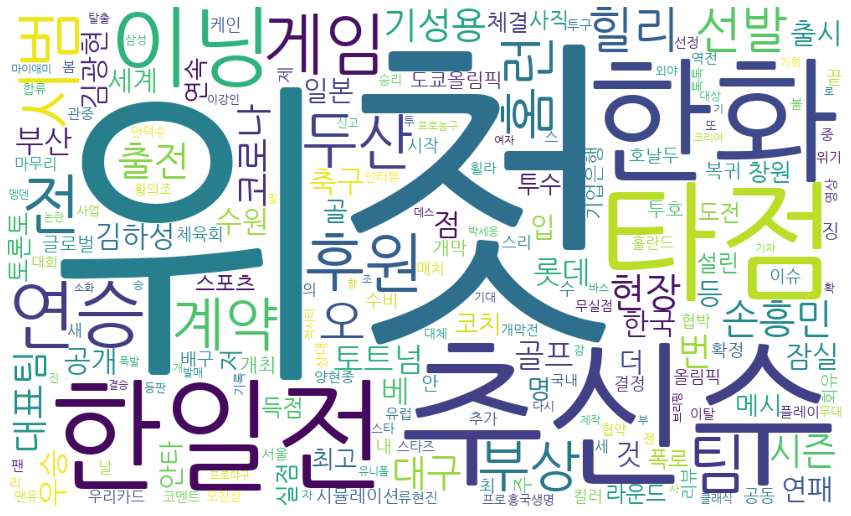

In [20]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_frequencies(han_text.vocab()))
plt.axis("off")
plt.show()